In [25]:
import matplotlib
!pip install quandl
import seaborn as sns
import quandl
import numpy as np
import scipy as sp
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
import sklearn.metrics
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

  Running setup.py bdist_wheel for inflection ... - done
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


In [26]:
apple=quandl.get("WIKI/AAPL")
apple.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0


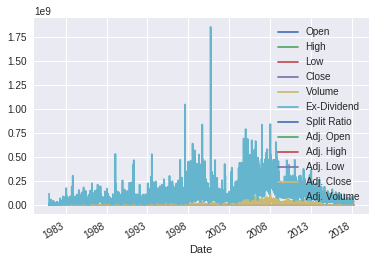

In [27]:
apple.plot()

In [28]:
apple.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [49]:
col=['Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']
apple.drop(col,inplace=True,axis=1,errors='ignore')
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0


In [30]:
ap=apple.tail(400)
ap.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-08-22,108.860,109.10,107.85,108.51,25820230.0
2016-08-23,108.590,109.32,108.53,108.85,21257669.0
2016-08-24,108.565,108.75,107.68,108.03,23675081.0
2016-08-25,107.390,107.88,106.68,107.57,25086248.0
2016-08-26,107.410,107.95,106.31,106.94,27766291.0


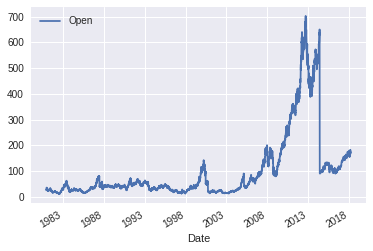

In [31]:
stp= apple[['Open']].copy()
stp.plot()

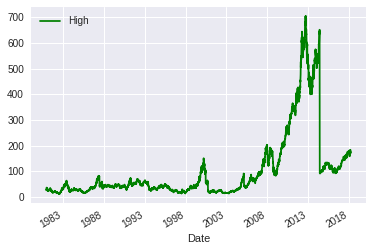

In [32]:
maxp= apple[['High']].copy()
maxp.plot(color="g")

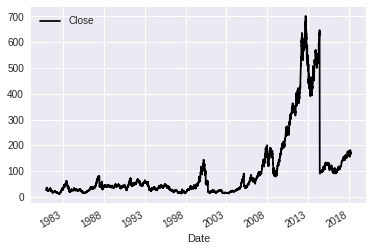

In [33]:
ltp= apple[['Close']].copy()
ltp.plot(color="black")

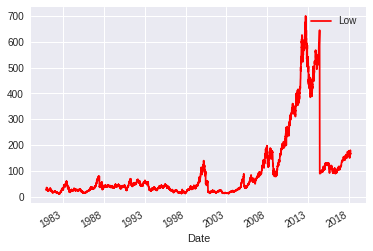

In [34]:
minp= apple[['Low']].copy()
minp.plot(color="r")

In [35]:
apple.describe()

,Open,High,Low,Close,Volume
count,9400.000000,9400.000000,9400.000000,9400.000000,9.400000e+03
mean,101.233437,102.466958,99.896250,101.194472,1.198560e+07
std,135.169307,136.294005,133.829528,135.087350,1.662310e+07
min,11.120000,11.120000,11.000000,11.000000,4.471000e+03
25%,27.000000,27.500000,26.500000,27.000000,1.232075e+06
50%,43.750000,44.500000,43.000000,43.880000,3.776200e+06
75%,110.120000,111.755000,108.747500,110.060000,1.808312e+07
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08


In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    
    rolmean = pd.rolling_mean(timeseries, window=365)
    rolstd = pd.rolling_std(timeseries, window=365)

    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

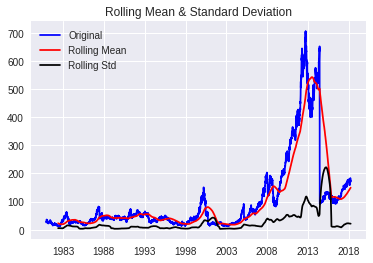

Results of Dickey-Fuller Test:
Test Statistic                   -2.119243
p-value                           0.236848
#Lags Used                       31.000000
Number of Observations Used    9368.000000
Critical Value (1%)              -3.431048
Critical Value (5%)              -2.861849
Critical Value (10%)             -2.566934
dtype: float64


In [37]:
test_stationarity(apple['High'])

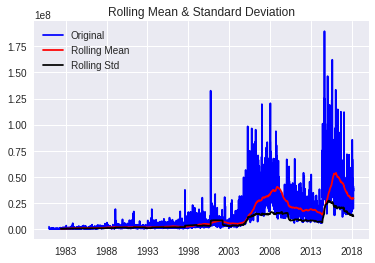

Results of Dickey-Fuller Test:
Test Statistic                   -3.239013
p-value                           0.017835
#Lags Used                       32.000000
Number of Observations Used    9367.000000
Critical Value (1%)              -3.431048
Critical Value (5%)              -2.861849
Critical Value (10%)             -2.566934
dtype: float64


In [38]:
test_stationarity(apple['Volume'])

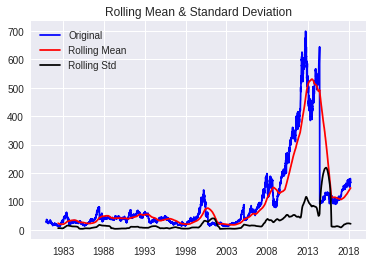

Results of Dickey-Fuller Test:
Test Statistic                   -2.122760
p-value                           0.235462
#Lags Used                       31.000000
Number of Observations Used    9368.000000
Critical Value (1%)              -3.431048
Critical Value (5%)              -2.861849
Critical Value (10%)             -2.566934
dtype: float64


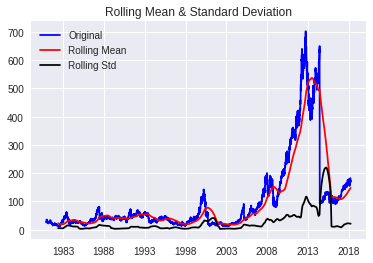

Results of Dickey-Fuller Test:
Test Statistic                   -2.125109
p-value                           0.234539
#Lags Used                       31.000000
Number of Observations Used    9368.000000
Critical Value (1%)              -3.431048
Critical Value (5%)              -2.861849
Critical Value (10%)             -2.566934
dtype: float64


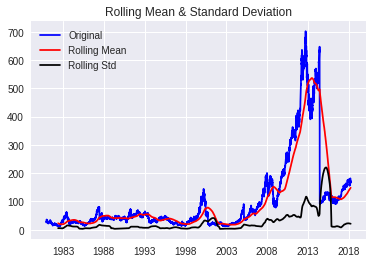

Results of Dickey-Fuller Test:
Test Statistic                   -2.154225
p-value                           0.223277
#Lags Used                       32.000000
Number of Observations Used    9367.000000
Critical Value (1%)              -3.431048
Critical Value (5%)              -2.861849
Critical Value (10%)             -2.566934
dtype: float64


In [39]:
test_stationarity(apple['Low'])
test_stationarity(apple['Open'])
test_stationarity(apple['Close'])


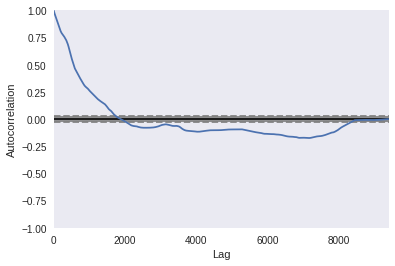

In [40]:
autocorrelation_plot(minp)

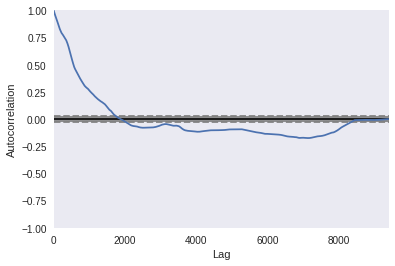

In [41]:
autocorrelation_plot(maxp)


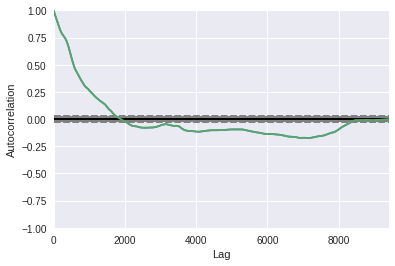

In [42]:
autocorrelation_plot(stp)
autocorrelation_plot(ltp)

In [0]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(apple.Low,order=(10,2,2))
model_fit = model.fit(disp=0)

0.3005637616415129


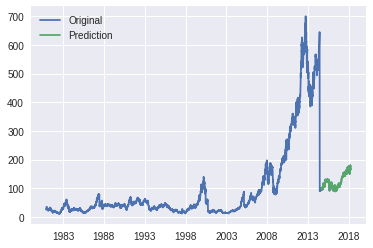

In [44]:
arima_pred = model_fit.predict(apple['Low'].index[8500], apple['Low'].index[-1], typ="levels")
plt.plot(apple.Low, label='Original')
plt.plot(arima_pred, label='Prediction')
plt.legend(loc=2)
x=apple.Low[8500]-arima_pred[0]
print(x)

[0.29847444055760963, 0.4784698340442057, 1.058224750419883, 0.1385032862885475, 3.7850741151987832, 1.0923812993685258, 0.8553105282193215, 0.7118069822609473, 1.6665068703965107, 1.4117748768532226, 2.1686030889074974, 1.0837653905691733, 0.5573682742650049, 2.89893574143256, 2.051622482198707, 0.5508831221264184, 0.4667796527082102, 0.5238871892062178, 0.3632359607473606, 0.4147390272435117, 3.3150055239589684, 0.4349870262237526, 0.4359299593687456, 1.6639274068341325, 1.6848517828147065, 0.8159796385929738, 1.217405838531984, 0.10696273611194192, 0.6086021316009828, 0.6278692142618301, 2.53199634088305, 0.5431882038964071, 0.28940681140909574, 1.4773352992115658, 3.3040288358315615, 0.04628457150541216, 1.528944161539048, 1.1744499971269804, 3.2431604246398074, 1.1689812787589884, 1.1768937881673613, 0.6667944076095678, 0.217317477508038, 0.4347289539031584, 1.1355421443840732, 0.5149356918032908, 1.486392726562413, 0.6657612298134233, 0.09422072272967708, 0.30050933373108213, 0.1

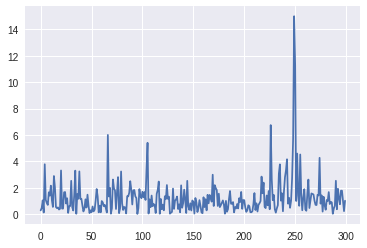

In [47]:
r=8500
i=0
f=list()
for r in range(8500,8800):
    z=apple.Low[r]-arima_pred[i]
    z=(z/apple.Low[r])*100
    if z<0:
        z=-z
    f.append(z)
    r=r+1
    i=i+1
print(f)
plt.plot(f)
average=sum(f)/len(f)
print(average)

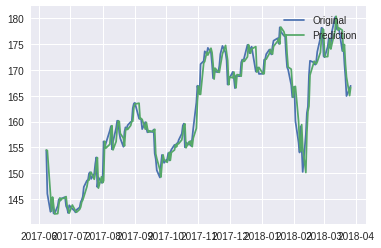

In [46]:
arima_pred_recent = model_fit.predict(apple['Low'].index[9200], apple['Low'].index[-1], typ="levels")
plt.plot(apple.Low[9200:], label='Original')
plt.plot(arima_pred_recent, label='Prediction')
plt.legend(loc=1)